# Pymaceuticals Inc.

## Analysis

* There isn’t a big gap of variations between all 10 drug regimens. But Ramicane, Capomulin, Ceftamin and Infubinol have lower standard deviation and SEM less than 0.5. Compared to the other drugs those 4 drug regimens have more reliability.
* Capomulin and Ramicane have the highest number of mice tested, 230 and 228 respectively whereas, Propriva had the least with only 148 mice tested.
* Distribution of female versus male mice is fair with only 2% difference. Male 51%  vs Female 49%.
* A case study for Capomulin treated mice ‘IS09, showed 3 picks in 3 different day ranges. 
    1.	First pick: tumor size increased 45 to 48 from first to day 20. Decreased to 44 after day 20 
    2.	Second pick: increased by 1 mm3 after day 30 and the tumor decreased to its lowest volume close to 40mm3. 
    3.	Third pick: tumor volume was increased to 42 mm3 after day 40.
It’s hard to conclude that the regimen was effective as the tumor kept on growing back.

* There is a strong correlation between mouse weight and the average tumor volume for the Capomulin regimen which is 0.84.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
mice_count = mouse_data["Mouse ID"].nunique()
mice_count

249

In [6]:
# Number of mice using len
mice = mouse_data["Mouse ID"].value_counts()
mice = len(mice)
mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data.loc[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_data.loc[mouse_data["Mouse ID"] =="g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_data[mouse_data["Mouse ID"].isin(dup_mice)==False]
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = mouse_clean["Mouse ID"].nunique()
clean_mice_count

248

# Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).mean()
#print(mean)
median = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).median()
#print(median)
variance = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).var()
#print(variance)
standard_deviation = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).std()
#print(variance)
sem = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).sem()
print(sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [12]:
# Assemble the resulting series into a single summary DataFrame.
tm_summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":standard_deviation,
    "Tumor Volume Std. Err.":sem,  
})
tm_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
sort_tm_df = tm_summary_df.sort_values("Tumor Volume Std. Dev.",ascending = True)
sort_tm_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = mouse_clean["Tumor Volume (mm3)"].groupby(mouse_clean["Drug Regimen"]).agg(["mean", "median", "var","std", "sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
sort_agg_df = agg_summary.sort_values("std",ascending = True)
sort_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Findings
* There isn’t a big gap of variations between all 10 drug regimens. But Ramicane, Capomulin, Ceftamin and Infubinol have lower standard deviation and SEM less than 0.5. Compared to the other drugs those 4 drug regimens have more reliability.

## Bar and Pie Charts

In [16]:
plt.rcParams["figure.figsize"] = (8,4)

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
m_count = mouse_clean["Drug Regimen"].value_counts()
m_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

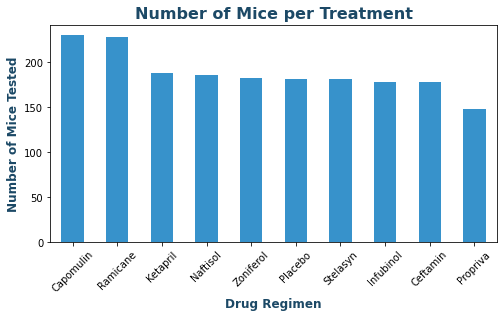

In [18]:
# Plot bar chart using pandas.
m_count.plot(kind ="bar", color = "#3792cb", rot = 45, align="center")
plt.xlabel("Drug Regimen", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.ylabel("Number of Mice Tested", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Number of Mice per Treatment", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.savefig("Images/bar1_NumberofMiceperTreatment.png", bbox_inches="tight")
plt.show()

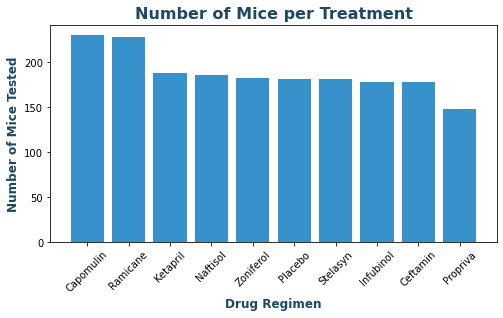

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = m_count.index.values
y_axis = m_count.values
#plt.figure(figsize = (10,6))
plt.bar(x_axis, y_axis,  color = "#3792cb")
plt.xlabel("Drug Regimen", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.ylabel("Number of Mice Tested", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Number of Mice per Treatment", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.xticks(rotation = 45)
plt.savefig("Images/bar2_NumberofMiceperTreatment.png", bbox_inches="tight")
plt.show()


In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Distribution of female versus male mice
m_sex = mouse_clean["Sex"].value_counts()
m_sex

Male      958
Female    922
Name: Sex, dtype: int64

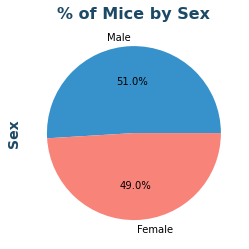

In [22]:
# Pie plot using pandas
colors = ["#3792cb","#F88379"]

m_sex.plot.pie(autopct="%1.1f%%", colors = colors)


plt.title("% of Mice by Sex", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.ylabel("Sex", fontsize = 14, color = "#1c4966", fontweight="bold")
plt.savefig("Images/pie1_MicebySex.png")
plt.show()

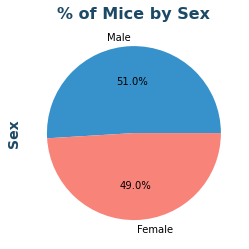

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = m_sex
colors = ["#3792cb","#F88379"]

plt.pie(sizes, labels = labels, colors = colors,  autopct="%1.1f%%")

plt.ylabel("Sex", fontsize = 14, color = "#1c4966", fontweight="bold")
plt.title("% of Mice by Sex", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.savefig("Images/pie2_MicebySex.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin",:]
ramicane_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Ramicane", :]
infubinol_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Infubinol", :]
ceftamin_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Ceftamin", :]

In [25]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Capomulin
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, mouse_clean, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [26]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be potential outliers.
Values above 51.83201549 could be potential outliers.


In [27]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Ramicane
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, mouse_clean, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [28]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds

ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be potential outliers.
Values above 54.30681135 could be potential outliers.


In [29]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Infubinol
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, mouse_clean, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [30]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds

infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be potential outliers.
Values above 82.74144559000001 could be potential outliers.


In [31]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Ceftamin
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, mouse_clean, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [32]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")

The lower quartile of Infubinol tumors: 48.72207785
The upper quartile of Infubinol tumors: 64.29983003
The interquartile range of Infubinol tumors: 15.577752179999997
The median of Infubinol tumors: 59.85195552 
Values below 25.355449580000002 could be potential outliers.
Values above 87.66645829999999 could be potential outliers.


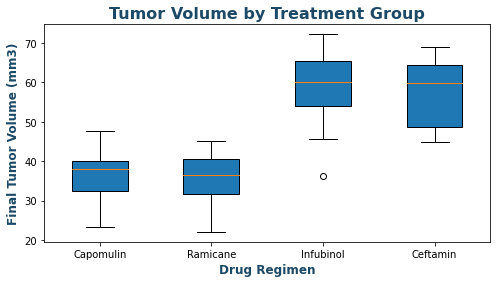

In [33]:
# Boxplots
data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Treatment Group", fontsize = 16, color = "#1c4966", fontweight="bold")
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 12, color = "#1c4966", fontweight="bold")
ax1.set_xlabel("Drug Regimen", fontsize = 12, color = "#1c4966", fontweight="bold")
ax1.boxplot(data, labels=drug_regimen, widths = 0.5, vert=True, patch_artist=True)
plt.savefig("Images/Boxplots1_TumorVolumebyRegimen.png")
plt.show()

### Quartiles, Outliers and Boxplots - For Loop

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
l_drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
l_drugs = mouse_clean[mouse_clean["Drug Regimen"].isin(drug_regimen)]
l_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [35]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = l_drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for l_drug in l_drug_regimen:
    print(l_drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
treatment = 0
for l_drug in l_drug_regimen:
    quartiles = last_timepoint[l_drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {l_drug} treatments is: {lowerq}")
    print(f"The upper quartile of {l_drug} treatments is: {upperq}")
    print(f"The interquartile range of {l_drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {l_drug} potential outliers.")
    print(f"Values above {upper_bound} could be {l_drug} potential outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin potential outliers.
Values above 51.83 could be Capomulin potential outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane potential outliers.
Values above 54.31 could be Ramicane potential outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol potential outliers.
Values above 82.75 could be Infubinol poten

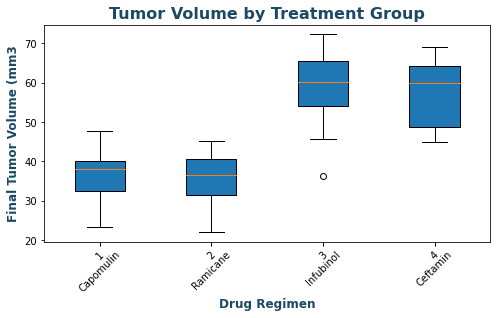

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for l_drug in l_drug_regimen:
    boxplot_list.append(list(last_timepoint[l_drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Drug Regimen", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.xticks([1,2,3,4], l_drug_regimen, rotation=45)
plt.ylabel("Final Tumor Volume (mm3", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Tumor Volume by Treatment Group", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.boxplot(boxplot_list, patch_artist=True )
plt.savefig("Images/Boxplots2_TumorVolumebyRegimen.png", bbox_inches="tight")
plt.show()
    

## Line and Scatter Plots

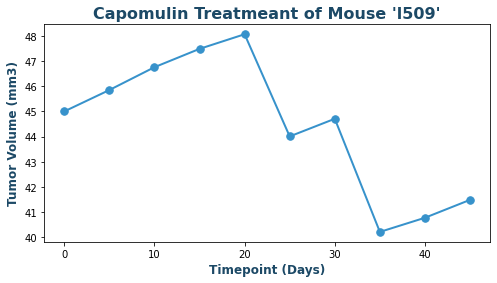

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor_size,linewidth=2, markersize=7.5,marker="o",color="#3792cb", label="Fahreneit")
plt.xlabel("Timepoint (Days)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Capomulin Treatmeant of Mouse 'l509'", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.savefig("Images/line_CapomulinTreatmeantofMousel509.png")

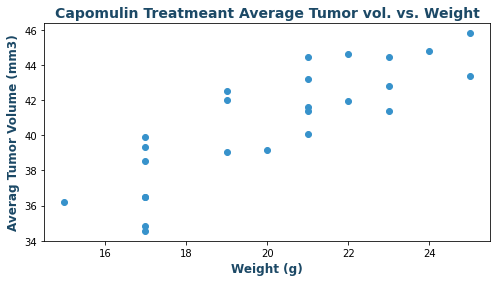

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots()
avg_capomulin = capomulin_df.groupby(["Mouse ID"]).mean()

marker_size=10
plt.scatter(avg_capomulin["Weight (g)"],avg_capomulin["Tumor Volume (mm3)"], color="#3792cb")
plt.xlabel("Weight (g)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Capomulin Treatmeant Average Tumor vol. vs. Weight", fontsize = 14, color = "#1c4966", fontweight="bold")
plt.savefig("Images/scatter1_AverageTumorvolvsWeight.png")

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin["Weight (g)"],avg_capomulin["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.")




The correlation coefficient between mouse weight and the average tumor volume for the Capomulin regimen is 0.84.


The r-squared is: 0.7089


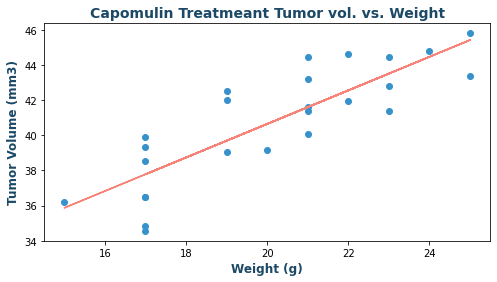

In [41]:
x_axis = avg_capomulin["Weight (g)"]
y_axis = avg_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,color="#3792cb")
plt.plot(x_axis, regress_values, color ="#F88379")
#plt.annotate(line_eq,(5.8,0.8),fontsize=8,color ="#F88379")
plt.xlabel("Weight (g)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontsize = 12, color = "#1c4966", fontweight="bold")
plt.title("Capomulin Treatmeant Tumor vol. vs. Weight", fontsize = 14, color = "#1c4966", fontweight="bold")
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.savefig("Images/scatter2_TumorvolvsWeight.png")
plt.show()